# Chapter 2

This file is used for the computations used in the LDM book, Chapter 2.

## Gambler's ruin

<IPython.core.display.Javascript object>


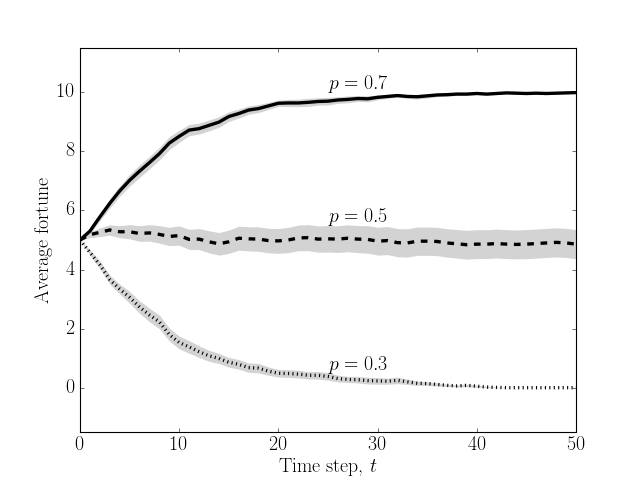

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', serif = 'Computer Modern Roman', size = 18)

COLORS    = ('-', '--', ':')
CONSTANTS = (0.7, 0.5, 0.3)
NRUNS     = 100;
TIMESTEPS = 50;

plt.figure()

for i in range(len(CONSTANTS)):
    p = CONSTANTS[i]
    
    P = np.array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                  [1-p, 0.0,  p , 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                  [0.0, 1-p, 0.0,  p , 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 1-p, 0.0,  p , 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 1-p, 0.0,  p , 0.0, 0.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 1-p, 0.0,  p , 0.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 0.0, 1-p, 0.0,  p , 0.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1-p, 0.0,  p , 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1-p, 0.0,  p , 0.0],
                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1-p, 0.0,  p ],
                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

    X = np.zeros((NRUNS, TIMESTEPS + 1))

    for r in range(NRUNS):
        X[r][0] = 5;

        for t in range(TIMESTEPS):
            X[r][t + 1] = np.where(rnd.multinomial(1, P[int(X[r][t])]) == 1)[0]

    x = np.array(range(TIMESTEPS + 1))
    y = np.mean(X, axis = 0)        
    err = np.std(X, axis = 0) / np.sqrt(NRUNS)

    lower_bound = y - err
    upper_bound = y + err

    plt.plot(x, y, 'k' + COLORS[i], linewidth = 3)
    plt.fill_between(x, lower_bound, upper_bound, facecolor = 'lightgray', linewidth = 0)

plt.show()
plt.axis([0, 50, -1.5, 11.5])
plt.xlabel('Time step, $t$')
plt.ylabel('Average fortune')
plt.text(25, 10.1, '$p=0.7$')
plt.text(25, 5.6, '$p=0.5$')
plt.text(25, 0.6, '$p=0.3$')
plt.savefig('gambler-result.pdf')

## PageRank

<IPython.core.display.Javascript object>


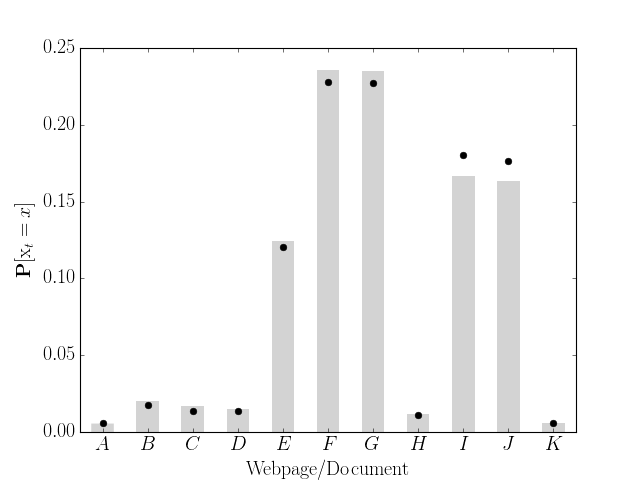

In [2]:
TIMESTEPS = 20000
TICKS = ('$A$', '$B$', '$C$', '$D$', '$E$', '$F$', '$G$', '$H$', '$I$', '$J$', '$K$')
GAMMA = 0.95

#               A    B    C    D    E    F    G    H    I    J    K
P = np.array([[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],   # A
              [0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],   # B
              [0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0],   # C
              [0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0],   # D
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],   # E
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],   # F
              [0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0],   # G
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.1],   # H
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],   # I
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],   # J
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]])  # K



X = np.zeros(TIMESTEPS + 1)
X[0] = np.random.choice(11)

for t in range(TIMESTEPS):
    if np.random.random() < GAMMA:
        X[t + 1] = np.where(rnd.multinomial(1, P[int(X[t])]) == 1)[0]
    else:
        X[t+1] = np.random.choice(11)
        
Y = (1 - GAMMA) / 11 * np.dot(np.ones(11), np.linalg.inv(np.eye(11) - GAMMA * P))
        
plt.figure();
plt.hist(X, 
         bins=[-0.5, 0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], 
         color='lightgray', 
         linewidth=0, 
         rwidth=0.5, 
         normed=True, 
         hold=True);
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], TICKS)
plt.plot(Y, 'ko')
plt.show()
plt.xlabel('Webpage/Document')
plt.ylabel('$\mathbf{P}[\mathrm{x}_t=x]$')
plt.savefig('pagerank-result.pdf')

## Linear model AR(1)

<IPython.core.display.Javascript object>


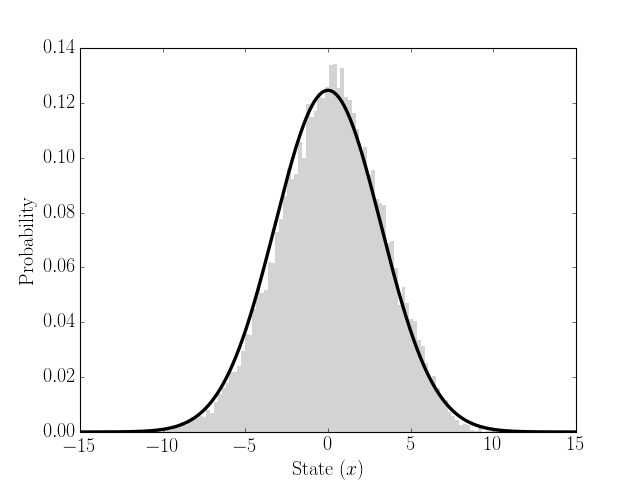

In [3]:
TIMESTEPS = 20000
ALPHA = 0.95

x = np.linspace(-15, 15, 1000)
y = np.sqrt((1 - ALPHA ** 2) / (2 * np.pi)) * np.exp(-x**2 * (1 - ALPHA ** 2) / 2)

X = np.zeros(TIMESTEPS + 1)
X[0] = rnd.random()

for t in range(TIMESTEPS):
    X[t+1] = ALPHA * X[t] + rnd.randn()    

plt.figure();
plt.hist(X, bins = 100, color = 'lightgray', linewidth = 0, normed = True, hold = True);
plt.plot(x, y, 'k-', linewidth = 3)
plt.show()
plt.xlabel('State ($x$)')
plt.ylabel('Probability')
plt.savefig('linear-stationary.pdf')

## MCMC

<IPython.core.display.Javascript object>


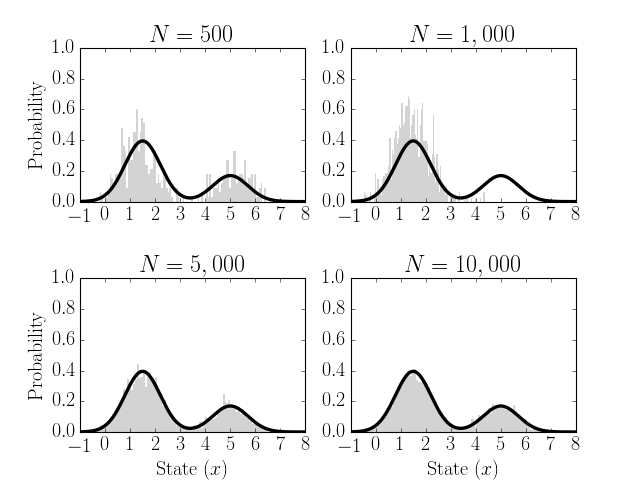

In [4]:
def mu(x):
        p1 = 1 / np.sqrt(2 * np.pi * 0.5) * np.exp(-(x - 1.5)**2 / (2 * 0.5))
        p2 = 1 / np.sqrt(2 * np.pi * 0.5) * np.exp(-(x - 5.0)**2 / (2 * 0.5))
        return 0.7 * p1 + 0.3 * p2
    
def mcmc(nsteps, w):

    def nu(x, y, w = 1):
        return 1 / np.sqrt(2 * np.pi * w ** 2) * np.exp(-(x - y)**2 / (2 * w ** 2))

    X = np.zeros(nsteps + 1)
    X[0] = rnd.random()

    for t in range(nsteps):
        x = X[t] + w * rnd.randn()
        u = rnd.random()
        gm = min(1, mu(x) * nu(X[t], x, W) / (mu(X[t]) * nu(x, X[t], W)))

        if u < gm:
            X[t + 1] = x
        else:
            X[t + 1] = X[t]
            
    return X

W = 0.5

x  = np.linspace(-1,8,1000)
y  = mu(x)

fig = plt.figure()

plt.subplot(221)
plt.plot(x, y, 'k-', linewidth = 3, hold = True)
plt.hist(mcmc(500, 0.5), bins = 100, color = 'lightgray', linewidth = 0, normed = True);
plt.title('$N=500$')
plt.ylabel('Probability')
plt.axis([-1, 8, 0, 1])

plt.subplot(222)
plt.plot(x, y, 'k-', linewidth = 3, hold = True)
plt.hist(mcmc(1000, 0.5), bins = 100, color = 'lightgray', linewidth = 0, normed = True);
plt.title('$N=1,000$')
plt.axis([-1, 8, 0, 1])

plt.subplot(223)
plt.plot(x, y, 'k-', linewidth = 3, hold = True)
plt.hist(mcmc(5000, 0.5), bins = 100, color = 'lightgray', linewidth = 0, normed = True);
plt.title('$N=5,000$')
plt.xlabel('State ($x$)')
plt.ylabel('Probability')
plt.axis([-1, 8, 0, 1])

plt.subplot(224)
plt.plot(x, y, 'k-', linewidth = 3, hold = True)
plt.hist(mcmc(10000, 0.5), bins = 100, color = 'lightgray', linewidth = 0, normed = True);
plt.title('$N=10,000$')
plt.xlabel('State ($x$)')
plt.axis([-1, 8, 0, 1])

fig.subplots_adjust(hspace=.5)

plt.show()
plt.savefig('mcmc-result.pdf')